In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

sales = pd.read_csv("data/sales_data.csv",
                    parse_dates=["Date"])

# prints data set but not all
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
# tells how many rows and columns we have
sales.shape

(113036, 18)

In [5]:
# types of columns (used for understanding them)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [6]:
# statistical values from dataset for each column (count, mean etc)
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### Bivariate Analysis

When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:


### 1. Numerical vs Numerical
* Scatterplot
* Line plot
* Heatmap for correlation
* Joint plot


### 2. Categorical vs. Numerical
* Bar chart
* Violin plot
* Categorical box plot
* Swarm plot


### 3. Two Categorical Variables
* Bar chart
* Grouped bar chart
* Point plot

In [7]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### Numerical vs Numerical

#### Scatter Plot

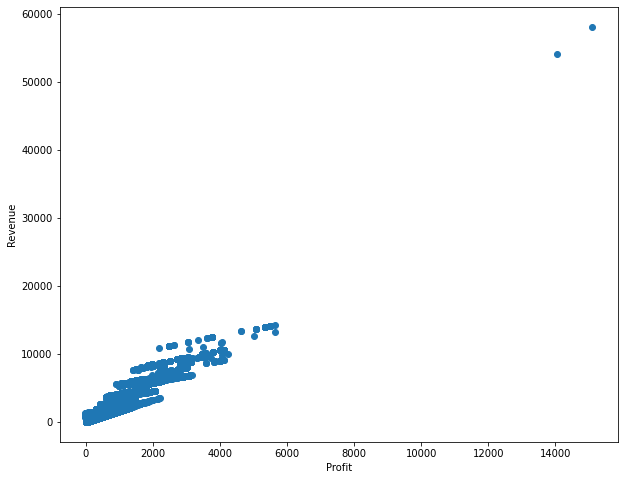

In [14]:
plt.figure(figsize = (10, 8))

plt.scatter(sales['Profit'], sales['Revenue'])

plt.xlabel('Profit')
plt.ylabel('Revenue')

plt.show()

#### Line Plot

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

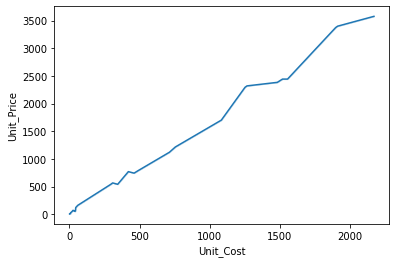

In [16]:
sns.lineplot(data=sales, x="Unit_Cost", y="Unit_Price")

#### Correlation Map

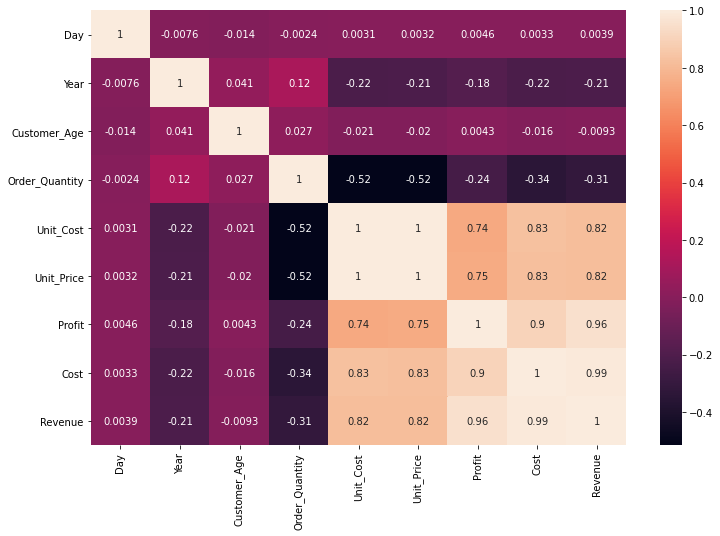

In [11]:
plt.figure(figsize=(12, 8))

vg_corr = sales.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

### Categorical vs Numerical

#### Bar Chart

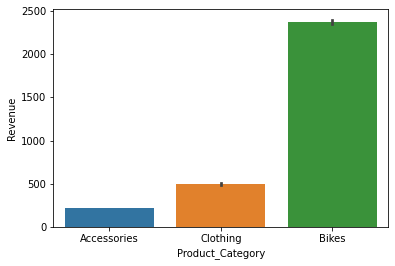

In [22]:
sns.barplot(x='Product_Category',y='Revenue',data=sales)
plt.show()

#### Box Plot

<AxesSubplot:xlabel='Product_Category', ylabel='Order_Quantity'>

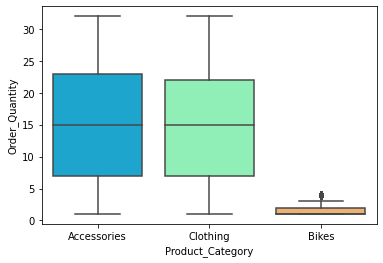

In [26]:
sns.boxplot(x='Product_Category',y='Order_Quantity',data=sales,palette='rainbow')

#### Violin Plot

<AxesSubplot:xlabel='Product_Category', ylabel='Customer_Age'>

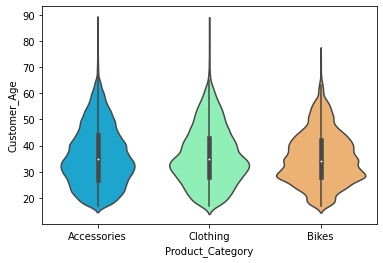

In [33]:
sns.violinplot(x="Product_Category", y="Customer_Age", data=sales, palette='rainbow')

### Two Categorical Variables

#### Grouped Bar Chart

<BarContainer object of 5 artists>

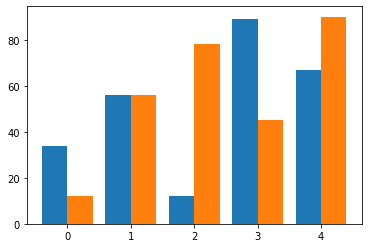

In [37]:
# create data 
x = np.arange(5) 
y1 = [34, 56, 12, 89, 67] 
y2 = [12, 56, 78, 45, 90] 
width = 0.40
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width) 
plt.bar(x+0.2, y2, width) 

## Numerical analysis and visualization

Analyze the Unit_Cost column:

In [7]:
# Analyzing Unit_Cost column
sales["Unit_Cost"].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [8]:
# if you want just print median,mean etc
sales["Unit_Cost"].mean()

267.296365759581

In [9]:
sales["Unit_Cost"].median()

9.0

AxesSubplot(0.125,0.125;0.775x0.755)


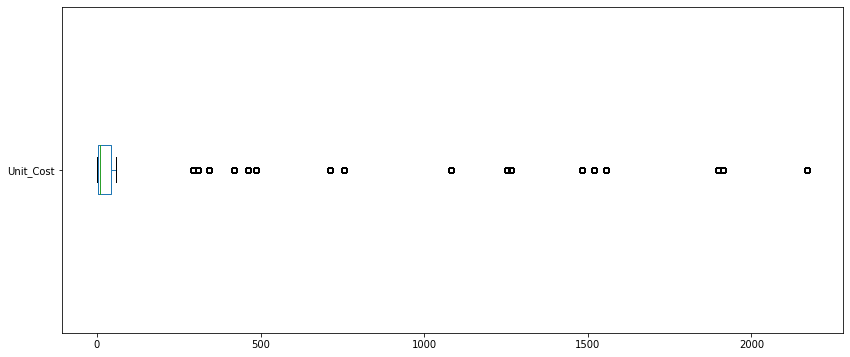

In [10]:
# green box shows median and other dots are outliers
sales["Unit_Cost"].plot(kind="box", vert=False, figsize=(14, 6))

<AxesSubplot:ylabel='Density'>

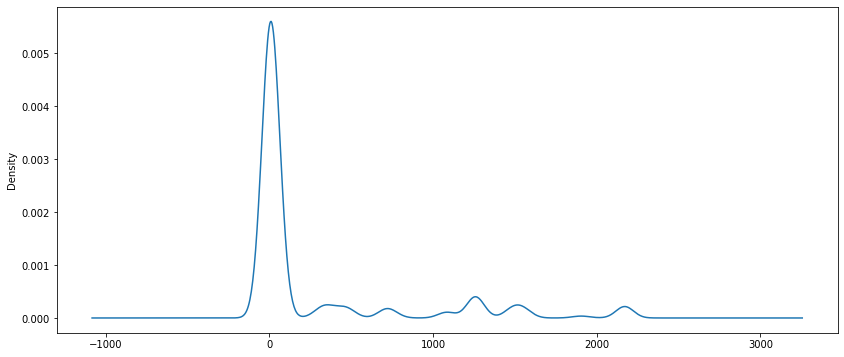

In [11]:
# density plot shows same thing
sales["Unit_Cost"].plot(kind="density", figsize=(14, 6))

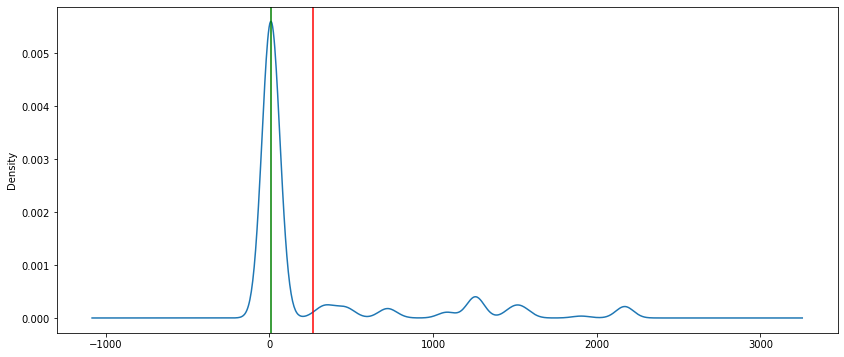

In [12]:
# showing density, mean and median
ax = sales["Unit_Cost"].plot(kind="density", figsize=(14, 6))
ax.axvline(sales["Unit_Cost"].mean(), color="red")
ax.axvline(sales["Unit_Cost"].median(), color="green")

Text(0.5, 0, 'dollars')

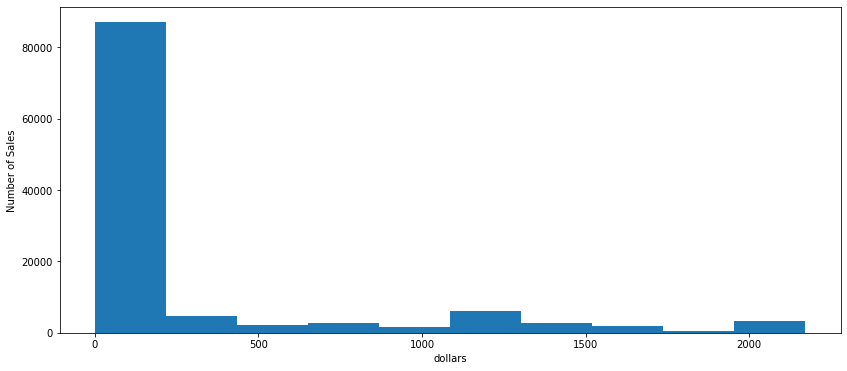

In [13]:
# Histogram
az = sales["Unit_Cost"].plot(kind="hist", figsize=(14, 6))
az.set_ylabel("Number of Sales")
az.set_xlabel("dollars")

## Categorical analysis and visualization

analyze the Age_Group column:

In [14]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [17]:
# Says that we have 4 different Age_Group values
sales["Age_Group"].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

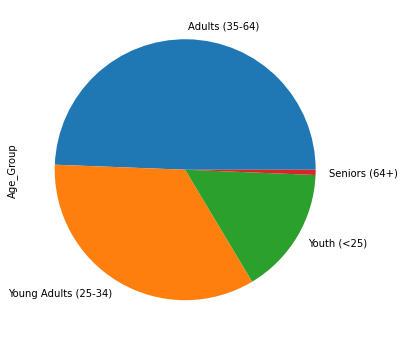

In [19]:
# Creates pie chart by using value_counts variables
sales["Age_Group"].value_counts().plot(kind="pie", figsize=(6,6))

Text(0, 0.5, 'Number of people')

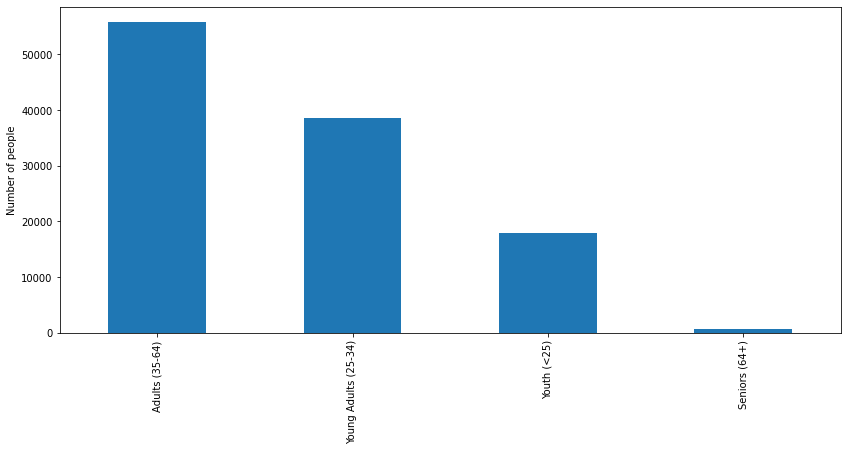

In [22]:
ax = sales["Age_Group"].value_counts().plot(kind="bar", figsize=(14, 6))
ax.set_ylabel("Number of people")

## Relationship between the columns?
Can we find any significant relationship?

In [24]:
corr = sales.corr() # stand for correlation
# shows the correlation between properties
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x7fe47d024090>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

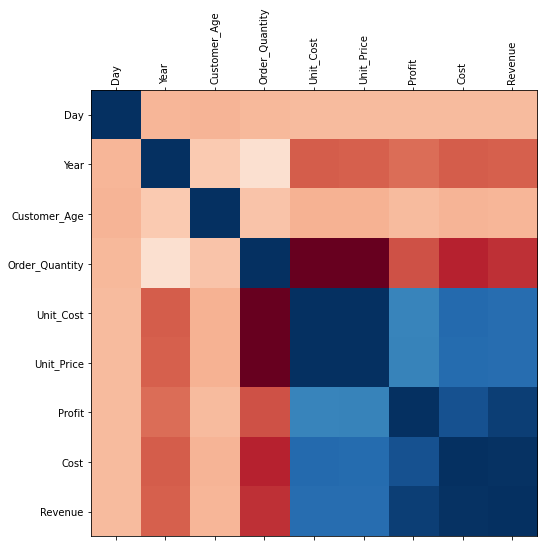

In [29]:
# High correlations are Blue lows are Red
fig = plt.figure(figsize=(8,8))
# cmap colors low to high -Red to Blue-
plt.matshow(corr, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical")
plt.yticks(range(len(corr.columns)), corr.columns)
## according to this graph, for ex Unit_Cost and Unit_Price has high correlation

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

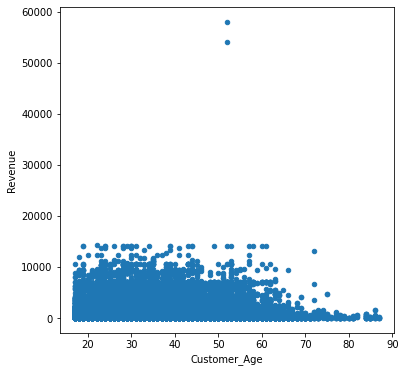

In [31]:
# Customer_age arttıkça revenue artmamış ondan az ilişkili
sales.plot(kind="scatter", x="Customer_Age", y="Revenue", figsize=(6, 6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

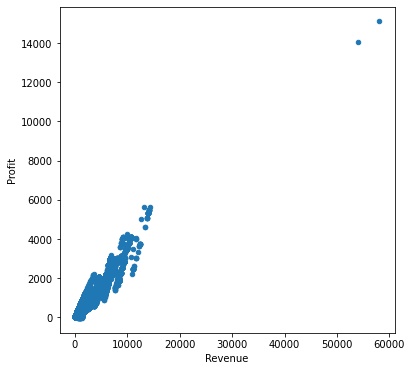

In [32]:
# Revenue arttıkça profit artmış doğru orantılı demek ki çok ilişkili
sales.plot(kind="scatter", x="Revenue", y="Profit", figsize=(6,6))

Text(0, 0.5, 'Profit')

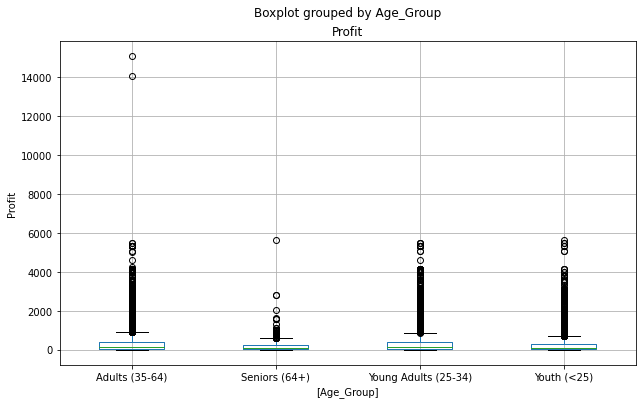

In [5]:
ax = sales[["Profit", "Age_Group"]].boxplot(by="Age_Group", figsize=(10, 6))
ax.set_ylabel("Profit")

## Column wrangling

We can also create new columns or modify existing ones.

### Add and calculate a new Revenue_per_Age column

In [8]:
# Create new column called Revenue_per_Age with dividing Revenue column by Customer_Age column

sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

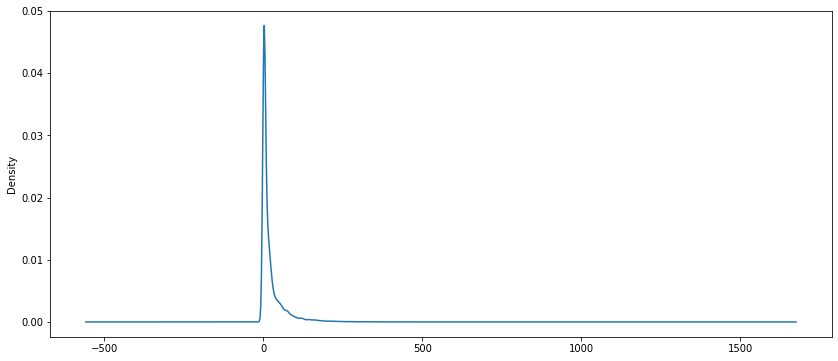

In [9]:
sales['Revenue_per_Age'].plot(kind = "density", figsize=(14, 6))

<AxesSubplot:ylabel='Frequency'>

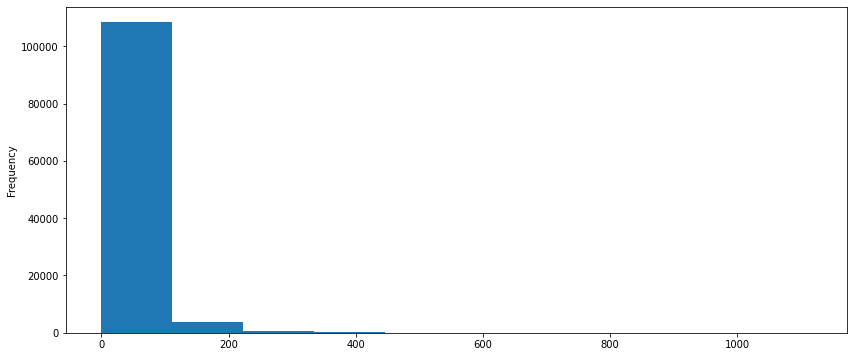

In [11]:
sales['Revenue_per_Age'].plot(kind = "hist", figsize=(14, 6))

### Add and calculate a new Calculated_Cost column

Formula is Calculated_Cost = Order_Quantity * Unit_Cost

In [12]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [13]:
# How many rows have different value than calculated cost
# We make a check
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

We can see the relationship between Cost and profit using a scatter plot:

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

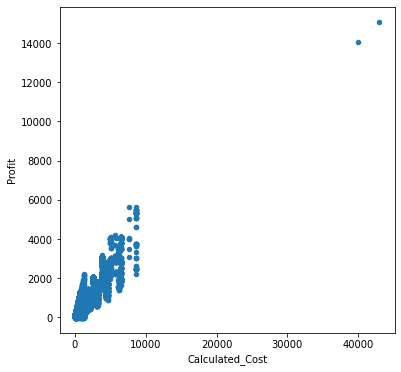

In [14]:
sales.plot(kind = 'scatter', x = 'Calculated_Cost', y = 'Profit', figsize=(6, 6))

### Add and calculate a new Calculated_Revenue column

Formula is Calculated_Revenue = Cost + Profit

In [15]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [17]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [18]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<AxesSubplot:ylabel='Frequency'>

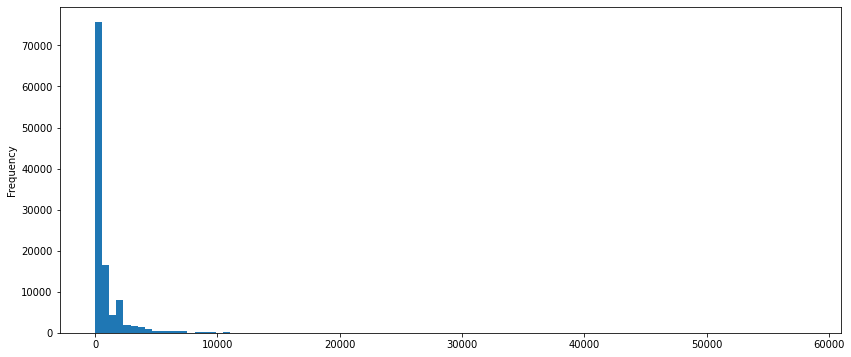

In [19]:
sales['Revenue'].plot(kind = "hist", bins = 100, figsize = (14, 6))